In [1]:
import nltk

In [2]:
from nltk import word_tokenize, sent_tokenize

In [3]:
import string

In [4]:
import pandas as pd
import re

In [5]:
string.punctuation = string.punctuation +'’'+'“'+'‘'+'—'+'”'

In [6]:
string.punctuation = string.punctuation.replace('.', '')
string.punctuation = string.punctuation.replace('*', '\*')

In [7]:
df=pd.read_excel('realdonaldtrump.csv.xlsx')

In [8]:
df

,id,link,content,date,retweets,favorites,mentions,hashtags
0,1.698309e+09,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 13:54:25,510.0,917.0,NaN,NaN
1,1.701461e+09,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-04 20:00:10,34.0,267.0,NaN,NaN
2,1.737480e+09,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 08:38:08,13.0,19.0,NaN,NaN
3,1.741161e+09,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 15:40:15,11.0,26.0,NaN,NaN
4,1.773561e+09,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 09:07:28,1375.0,1945.0,NaN,NaN
...,...,...,...,...,...,...,...,...
43347,1.273405e+18,https://twitter.com/realDonaldTrump/status/127...,Joe Biden was a TOTAL FAILURE in Government. H...,2020-06-17 19:00:32,23402.0,116377.0,NaN,NaN
43348,1.273408e+18,https://twitter.com/realDonaldTrump/status/127...,Will be interviewed on @ seanhannity tonight a...,2020-06-17 19:11:47,11810.0,56659.0,@seanhannity,NaN
43349,1.273442e+18,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/3lm1spbU8X,2020-06-17 21:27:33,4959.0,19344.0,NaN,NaN
43350,1.273442e+18,https://twitter.com/realDonaldTrump/status/127...,pic.twitter.com/vpCE5MadUz,2020-06-17 21:28:38,4627.0,17022.0,NaN,NaN


In [9]:
content=df['content']

In [10]:
content

0        Be sure to tune in and watch Donald Trump on L...
1        Donald Trump will be appearing on The View tom...
2        Donald Trump reads Top Ten Financial Tips on L...
3        New Blog Post: Celebrity Apprentice Finale and...
4        "My persona will never be that of a wallflower...
                               ...                        
43347    Joe Biden was a TOTAL FAILURE in Government. H...
43348    Will be interviewed on @ seanhannity tonight a...
43349                           pic.twitter.com/3lm1spbU8X
43350                           pic.twitter.com/vpCE5MadUz
43351                           pic.twitter.com/VLlc0BHW41
Name: content, Length: 43352, dtype: object

In [11]:
content = content.apply(lambda x: re.split('https:\/\/.*', str(x))[0])
content = content.apply(lambda x: re.split('http:\/\/.*', str(x))[0])

# Task 1

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(content, test_size=0.2, random_state=42)

In [13]:
train

14880    " @ HRGuySerchia: @ TotalSportsNews @ nfl @ bu...
28243                           # VoteTrumpMI! # Trump2016
31985    . @ FLOTUS & I were honored to host our first ...
37584    With incredible grit, skill, and pride, the 7,...
18107    " @ steeldestroyer: @ realDonaldTrump I agree ...
                               ...                        
6265           @zniosdig @ MELANIATRUMP Very kind, thanks.
11284    " @ StevanScheer: @ realDonaldTrump attended T...
38158    S&P 500 hits new record high. Up 19% for the y...
860      When it comes to China, @ BarackObama practice...
15795    " @ Robert_W_GA: @ realDonaldTrump they think ...
Name: content, Length: 34681, dtype: object

In [14]:
test

40463    “The Democrats are getting hit and slammed on ...
8763     "@DeannaSpillyard: @ realdonaldtrump You are a...
10371    " @ TroyMeaz: @ realDonaldTrump america is fal...
24526    . @ redstate I miss you all, and thanks for al...
24717    # MakeAmericaGreatAgain From my speech in Sout...
                               ...                        
10820    A good question for would-be entrepreneurs to ...
8497     The dying @ VanityFair’s circulation has “drop...
6550                                @ gleasondp Good idea.
25422    The arrogant young woman who questioned me in ...
12465    " @ CheifSoda: @ realDonaldTrump should be the...
Name: content, Length: 8671, dtype: object

# Task 2

In [15]:
pattern = r"[{}]".format(re.escape(string.punctuation))

In [16]:
train = train.str.replace(pattern,'')

C:\Users\m_usa\AppData\Local\Temp\ipykernel_12488\3676210766.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train = train.str.replace(pattern,'')


In [17]:
test = test.str.replace(pattern,'')

C:\Users\m_usa\AppData\Local\Temp\ipykernel_12488\1022568346.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test = test.str.replace(pattern,'')


# Task 3

In [18]:
train=train.reset_index()['content']

In [19]:
test=test.reset_index()['content']

In [20]:
for line in range(len(train)):
    train[line]=train[line].replace("\n", " ")

In [21]:
for line in range(len(test)):
    test[line]=test[line].replace("\n", " ")

# Task 4

In [22]:
stopwords=set(nltk.corpus.stopwords.words('english'))

In [23]:
for line in range(len(train)):
    word_tokens = word_tokenize(train[line])
  
    train[line] = [w for w in word_tokens if not w.lower() in stopwords]

In [24]:
for line in range(len(test)):
    word_tokens = word_tokenize(test[line])
  
    test[line] = [w for w in word_tokens if not w.lower() in stopwords]

In [25]:
train

0        [HRGuySerchia, TotalSportsNews, nfl, buffalobi...
1                                 [VoteTrumpMI, Trump2016]
2        [., FLOTUS, honored, host, first, WH, Congress...
3        [incredible, grit, skill, pride, 7000, workers...
4        [steeldestroyer, realDonaldTrump, agree, u., g...
                               ...                        
34676            [zniosdig, MELANIATRUMP, kind, thanks, .]
34677    [StevanScheer, realDonaldTrump, attended, Tax,...
34678    [SP, 500, hits, new, record, high, ., 19, year...
34679    [comes, China, BarackObama, practices, pretty,...
34680    [RobertWGA, realDonaldTrump, think, course, ol...
Name: content, Length: 34681, dtype: object

In [26]:
test

0       [Democrats, getting, hit, slammed, Impeachment...
1       [DeannaSpillyard, realdonaldtrump, wise, man, ...
2       [TroyMeaz, realDonaldTrump, america, falling, ...
3       [., redstate, miss, thanks, support, ., Politi...
4       [MakeAmericaGreatAgain, speech, South, Carolin...
                              ...                        
8666    [good, question, wouldbe, entrepreneurs, ask, ...
8667    [dying, VanityFairs, circulation, dropped, new...
8668                           [gleasondp, Good, idea, .]
8669    [arrogant, young, woman, questioned, nasty, fa...
8670    [CheifSoda, realDonaldTrump, next, president, ...
Name: content, Length: 8671, dtype: object

# Task 5

In [27]:
from nltk import ngrams
Bigram=[]
Trigram=[]
for i in content:
    b=ngrams(i.split(), 2)
    for j in b:
        Bigram.append(j)
        
    t=ngrams(i.split(), 3)
    for j in t:
        Trigram.append(j)

In [28]:
Bigram

[('Be', 'sure'),
 ('sure', 'to'),
 ('to', 'tune'),
 ('tune', 'in'),
 ('in', 'and'),
 ('and', 'watch'),
 ('watch', 'Donald'),
 ('Donald', 'Trump'),
 ('Trump', 'on'),
 ('on', 'Late'),
 ('Late', 'Night'),
 ('Night', 'with'),
 ('with', 'David'),
 ('David', 'Letterman'),
 ('Letterman', 'as'),
 ('as', 'he'),
 ('he', 'presents'),
 ('presents', 'the'),
 ('the', 'Top'),
 ('Top', 'Ten'),
 ('Ten', 'List'),
 ('List', 'tonight!'),
 ('Donald', 'Trump'),
 ('Trump', 'will'),
 ('will', 'be'),
 ('be', 'appearing'),
 ('appearing', 'on'),
 ('on', 'The'),
 ('The', 'View'),
 ('View', 'tomorrow'),
 ('tomorrow', 'morning'),
 ('morning', 'to'),
 ('to', 'discuss'),
 ('discuss', 'Celebrity'),
 ('Celebrity', 'Apprentice'),
 ('Apprentice', 'and'),
 ('and', 'his'),
 ('his', 'new'),
 ('new', 'book'),
 ('book', 'Think'),
 ('Think', 'Like'),
 ('Like', 'A'),
 ('A', 'Champion!'),
 ('Donald', 'Trump'),
 ('Trump', 'reads'),
 ('reads', 'Top'),
 ('Top', 'Ten'),
 ('Ten', 'Financial'),
 ('Financial', 'Tips'),
 ('Tips', 'on'),

In [29]:
Trigram

[('Be', 'sure', 'to'),
 ('sure', 'to', 'tune'),
 ('to', 'tune', 'in'),
 ('tune', 'in', 'and'),
 ('in', 'and', 'watch'),
 ('and', 'watch', 'Donald'),
 ('watch', 'Donald', 'Trump'),
 ('Donald', 'Trump', 'on'),
 ('Trump', 'on', 'Late'),
 ('on', 'Late', 'Night'),
 ('Late', 'Night', 'with'),
 ('Night', 'with', 'David'),
 ('with', 'David', 'Letterman'),
 ('David', 'Letterman', 'as'),
 ('Letterman', 'as', 'he'),
 ('as', 'he', 'presents'),
 ('he', 'presents', 'the'),
 ('presents', 'the', 'Top'),
 ('the', 'Top', 'Ten'),
 ('Top', 'Ten', 'List'),
 ('Ten', 'List', 'tonight!'),
 ('Donald', 'Trump', 'will'),
 ('Trump', 'will', 'be'),
 ('will', 'be', 'appearing'),
 ('be', 'appearing', 'on'),
 ('appearing', 'on', 'The'),
 ('on', 'The', 'View'),
 ('The', 'View', 'tomorrow'),
 ('View', 'tomorrow', 'morning'),
 ('tomorrow', 'morning', 'to'),
 ('morning', 'to', 'discuss'),
 ('to', 'discuss', 'Celebrity'),
 ('discuss', 'Celebrity', 'Apprentice'),
 ('Celebrity', 'Apprentice', 'and'),
 ('Apprentice', 'and', 

# Task 6

In [30]:
#BiGram

In [31]:
frequency_Bigrams = nltk.FreqDist(Bigram)
Bigrams_vocabulary = set(Bigram)

for word in frequency_Bigrams.keys():
    frequency_Bigrams[word] += 1
    
probability_Bigrams = {"Word":[], "Frequency":[]}


for word in frequency_Bigrams.keys():
    probability_Bigrams["Word"].append(word)
    probability_Bigrams["Frequency"].append(frequency_Bigrams[word])


In [32]:
probability_Bigrams=pd.DataFrame(probability_Bigrams)

In [33]:
probability_Bigrams

,Word,Frequency
0,"(Be, sure)",67
1,"(sure, to)",108
2,"(to, tune)",33
3,"(tune, in)",28
4,"(in, and)",24
...,...,...
382173,"(FAILURE, in)",2
382174,"(Government., He)",2
382175,"(He, “bungled”)",2
382176,"(“bungled”, everything)",2


array([[<AxesSubplot:title={'center':'Frequency'}>]], dtype=object)

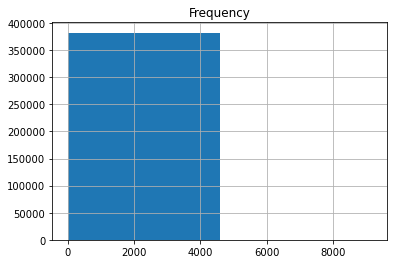

In [34]:
probability_Bigrams.hist(bins=2)

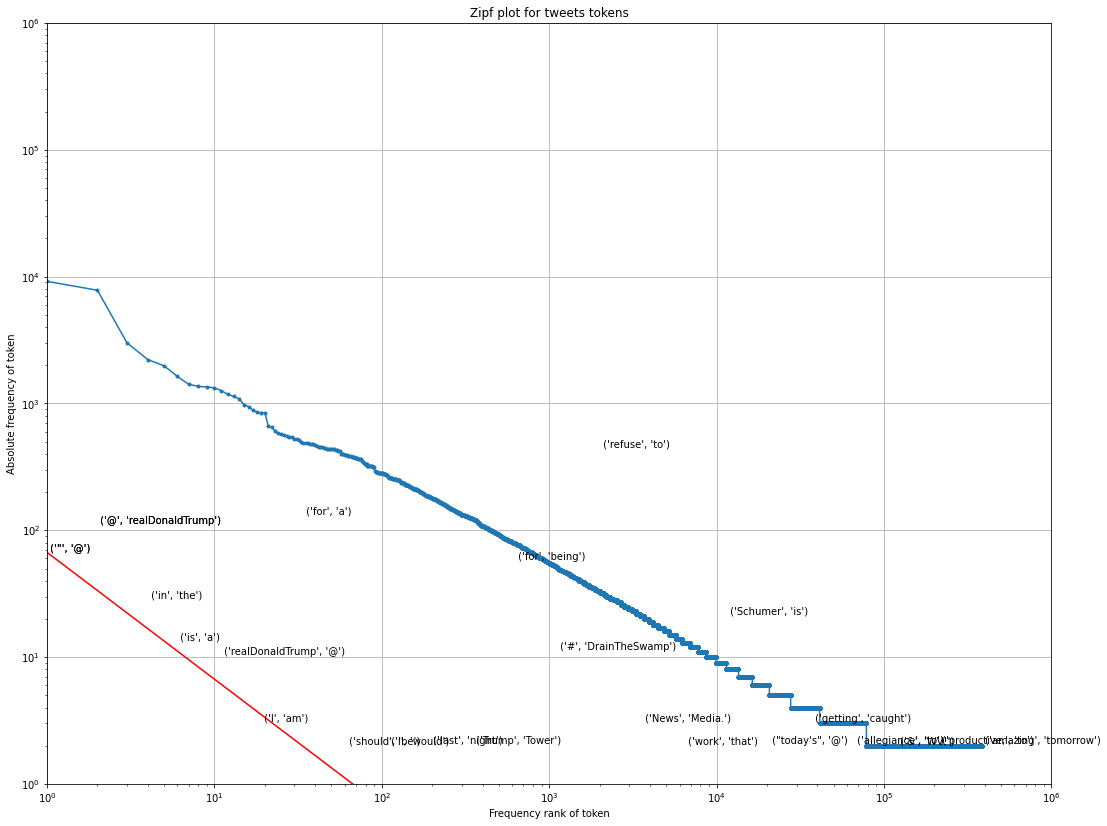

In [35]:
from pylab import *
counts = probability_Bigrams.Frequency
tokens = probability_Bigrams.Word
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(18,14))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + str(tokens[indices[n]]), 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [36]:
#Trigram

In [37]:
frequency_Trigrams = nltk.FreqDist(Trigram)
Trigrams_vocaTrulary = set(Trigram)

for word in frequency_Trigrams.keys():
    frequency_Trigrams[word] += 1
    
probability_Trigrams = {"Word":[], "Frequency":[]}


for word in frequency_Trigrams.keys():
    probability_Trigrams["Word"].append(word)
    probability_Trigrams["Frequency"].append(frequency_Trigrams[word])


In [38]:
probability_Trigrams=pd.DataFrame(probability_Trigrams)

In [39]:
probability_Trigrams

,Word,Frequency
0,"(Be, sure, to)",67
1,"(sure, to, tune)",25
2,"(to, tune, in)",22
3,"(tune, in, and)",2
4,"(in, and, watch)",2
...,...,...
620268,"(Government., He, “bungled”)",2
620269,"(He, “bungled”, everything)",2
620270,"(“bungled”, everything, that)",2
620271,"(everything, that, he)",2


array([[<AxesSubplot:title={'center':'Frequency'}>]], dtype=object)

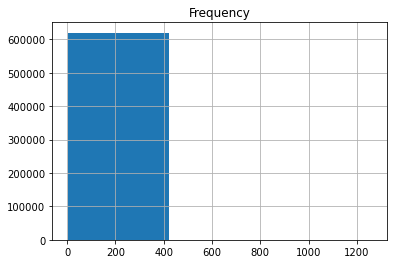

In [40]:
probability_Trigrams.hist(bins=3)

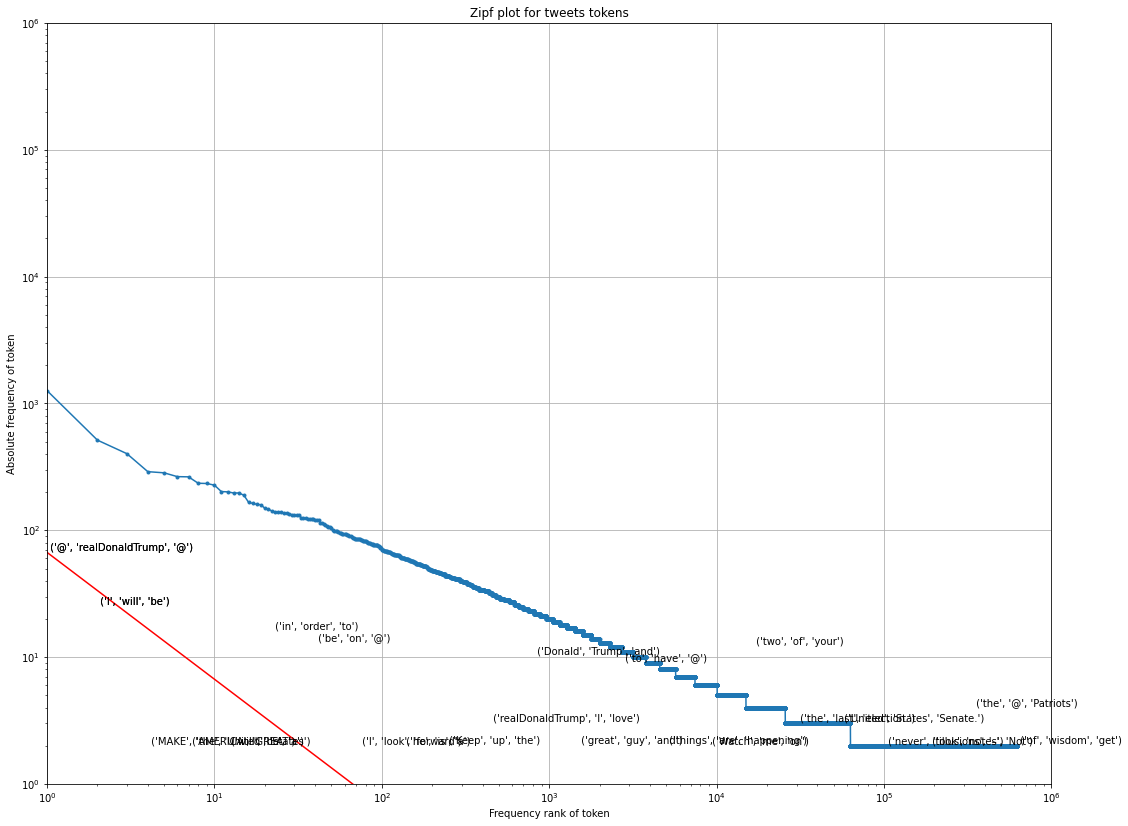

In [41]:
from pylab import *
counts = probability_Trigrams.Frequency
tokens = probability_Trigrams.Word
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(18,14))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + str(tokens[indices[n]]), 
                 verticalalignment="bottom",
                 horizontalalignment="left")

# Task 7

In [42]:
probability_Bigrams['Frequency']=probability_Bigrams['Frequency']+1
probability_Bigrams['Frequency']

0          68
1         109
2          34
3          29
4          25
         ... 
382173      3
382174      3
382175      3
382176      3
382177      3
Name: Frequency, Length: 382178, dtype: int64

In [43]:
probability_Trigrams['Frequency']=probability_Trigrams['Frequency']+1
probability_Trigrams['Frequency']

0         68
1         26
2         23
3          3
4          3
          ..
620268     3
620269     3
620270     3
620271     3
620272     3
Name: Frequency, Length: 620273, dtype: int64

# Task 8

In [44]:
probability_Bigrams['probability']=probability_Bigrams['Frequency']/sum(probability_Bigrams['Frequency'])
probability_Bigrams=probability_Bigrams.sort_values(by=['probability'])
probability_Bigrams[['Word','probability']].to_dict()

{'Word': {382177: ('he', 'touched!'),
  204681: ('guys', '(gals)'),
  204680: ('fund', 'guys'),
  327341: ('Dollar', 'Mueller'),
  204678: ('The', 'hedge'),
  204677: ('only', 'working'),
  204676: ('am', 'only'),
  204682: ('(gals)', 'have'),
  204675: ('lobbyists.', 'I'),
  204673: ('interests', 'or'),
  204672: ('donors,', 'special'),
  204671: ('my', 'donors,'),
  327342: ('was', 'released'),
  327344: ('crime', 'caused'),
  204667: ('By', 'self-funding'),
  204674: ('or', 'lobbyists.'),
  204683: ('pay', 'higher'),
  204684: ('taxes', 'ASAP.'),
  204685: ('ASAP.', 'They'),
  204700: ('PressTV:', 'Poll:'),
  204699: ('@', 'PressTV:'),
  204698: ('any', 'Dem:'),
  204697: ('defeat', 'any'),
  204696: ('would', 'defeat'),
  204695: ('surveyusa', 'poll,'),
  327338: ('Everybody,', 'including'),
  204693: ('today,', 'according'),
  204692: ('held', 'today,'),
  327339: ('including', 'me,'),
  204690: ('middle', 'class!'),
  327340: ('me,', 'thought'),
  204688: ('must', 'reduce'),
  20

In [45]:
probability_Trigrams['probability']=probability_Trigrams['Frequency']/sum(probability_Trigrams['Frequency'])
probability_Trigrams=probability_Trigrams.sort_values(by=['probability'])
probability_Trigrams[['Word','probability']].to_dict()

{'Word': {310136: ('best', '#', 'MakeAmericaGreatAgain"'),
  407937: ('FILES', 'to', 'be'),
  407938: ('to', 'be', 'opened.'),
  407939: ('People', 'get', 'what'),
  407941: ('is', 'going', 'on!'),
  407942: ('Market', 'hits', 'another'),
  407943: ('hits', 'another', 'all'),
  407936: ('JFK', 'FILES', 'to'),
  407944: ('another', 'all', 'time'),
  407948: ('Friday.', '5.3', 'trillion'),
  407949: ('5.3', 'trillion', 'dollars'),
  407950: ('trillion', 'dollars', 'up'),
  407951: ('dollars', 'up', 'since'),
  407952: ('up', 'since', 'Election.'),
  407953: ('since', 'Election.', 'Fake'),
  407947: ('on', 'Friday.', '5.3'),
  407954: ('Election.', 'Fake', 'News'),
  407935: ('classified', 'JFK', 'FILES'),
  407933: ('blocked', 'and', 'classified'),
  407917: ('killing', 'the', 'Democrat'),
  407919: ('Subject', 'to', 'the'),
  407920: ('to', 'the', 'receipt'),
  407921: ('the', 'receipt', 'of'),
  407922: ('receipt', 'of', 'further'),
  407923: ('of', 'further', 'information,'),
  407934

# Task 9

In [46]:
probability_Bigrams

,Word,Frequency,probability
382177,"(he, touched!)",3,0.000002
204681,"(guys, (gals))",3,0.000002
204680,"(fund, guys)",3,0.000002
327341,"(Dollar, Mueller)",3,0.000002
204678,"(The, hedge)",3,0.000002
...,...,...,...
23,"(will, be)",1981,0.001235
1674,"(in, the)",2218,0.001383
172,"(of, the)",3012,0.001878
9556,"(@, realDonaldTrump)",7812,0.004872


In [47]:
probability_Trigrams

,Word,Frequency,probability
310136,"(best, #, MakeAmericaGreatAgain"")",3,0.000001
407937,"(FILES, to, be)",3,0.000001
407938,"(to, be, opened.)",3,0.000001
407939,"(People, get, what)",3,0.000001
407941,"(is, going, on!)",3,0.000001
...,...,...,...
309,"(one, of, the)",285,0.000140
108498,"(MAKE, AMERICA, GREAT)",291,0.000143
77681,"(@, realDonaldTrump, I)",403,0.000198
1260,"(I, will, be)",515,0.000253


# Task 10

array([[<AxesSubplot:title={'center':'Frequency'}>]], dtype=object)

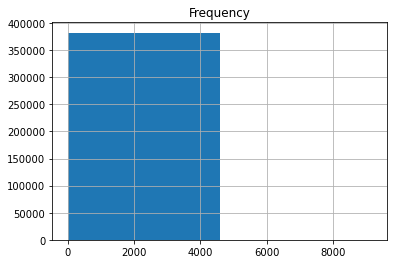

In [48]:
#bigram
probability_Bigrams[['Word','Frequency']].hist(bins=2)

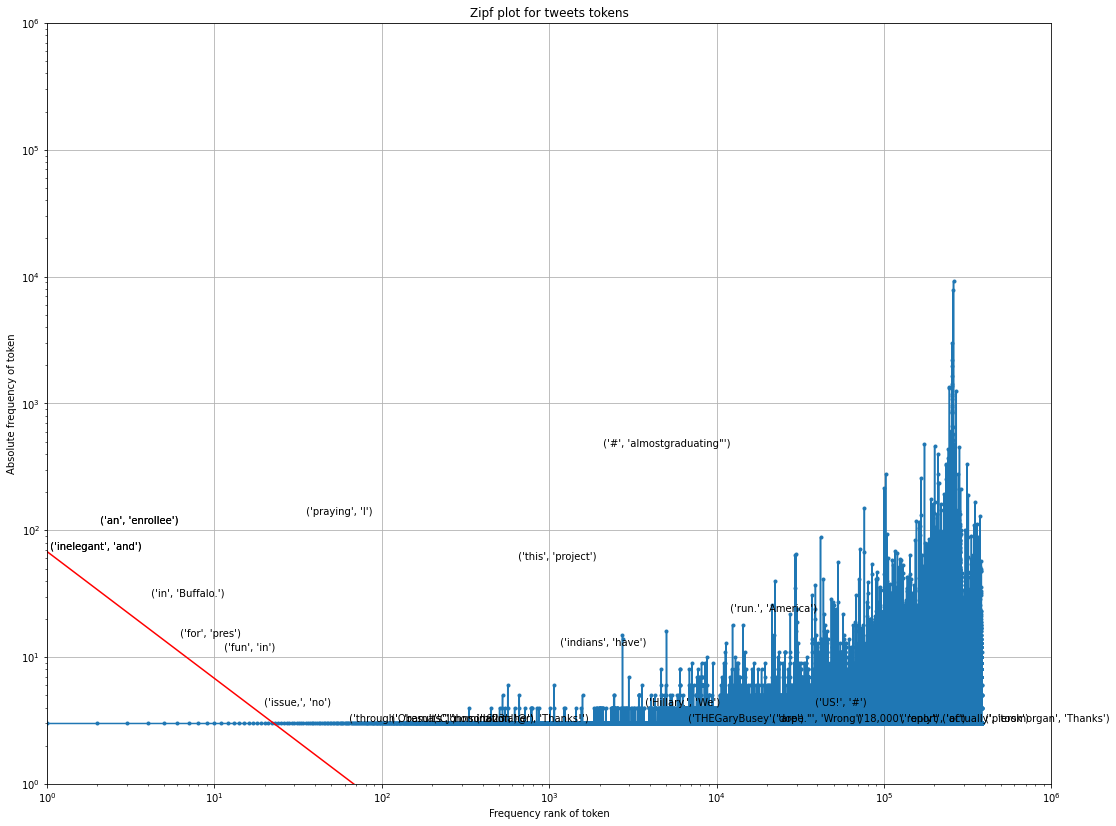

In [49]:
from pylab import *
counts = probability_Bigrams.Frequency
tokens = probability_Bigrams.Word
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(18,14))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + str(tokens[indices[n]]), 
                 verticalalignment="bottom",
                 horizontalalignment="left")

array([[<AxesSubplot:title={'center':'Frequency'}>]], dtype=object)

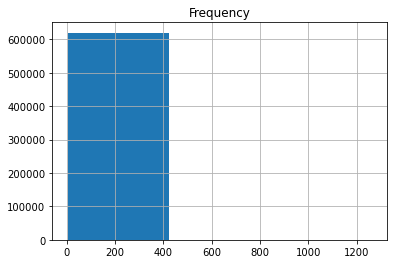

In [50]:
#Trigram
probability_Trigrams[['Word','Frequency']].hist(bins=3)

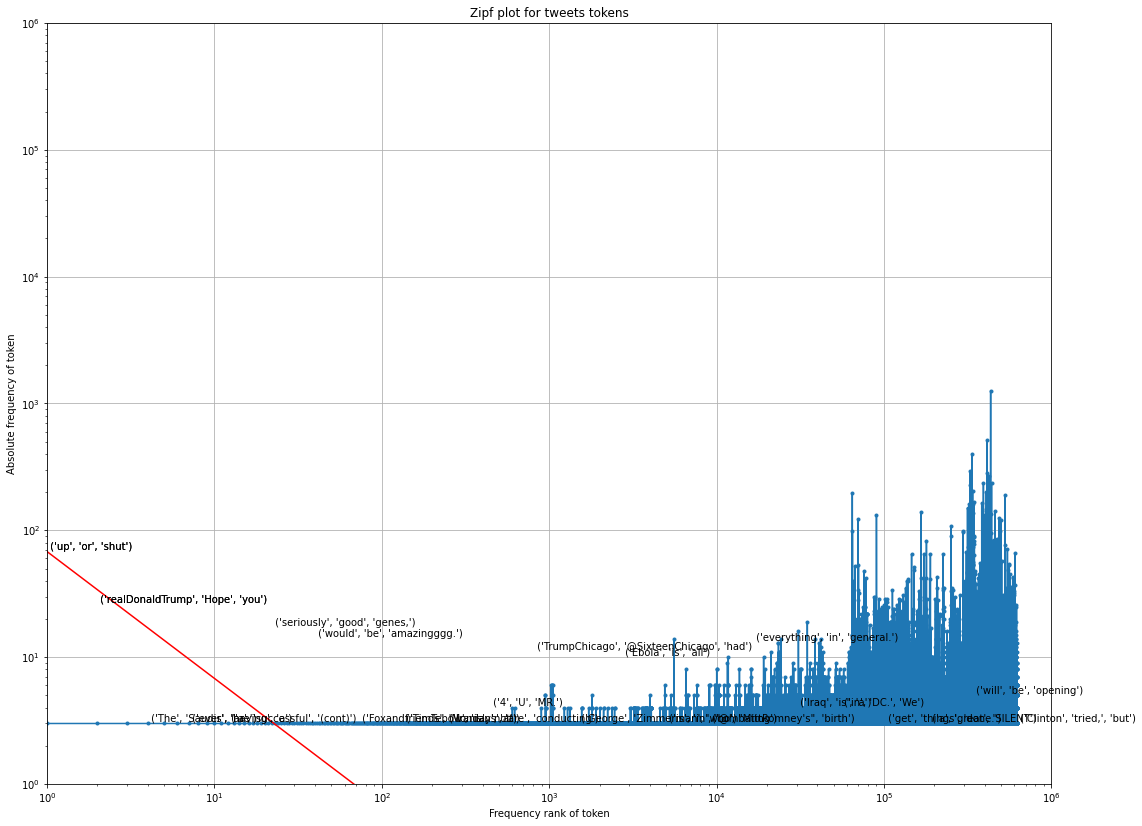

In [51]:
from pylab import *
counts = probability_Trigrams.Frequency
tokens = probability_Trigrams.Word
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(18,14))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for tweets tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + str(tokens[indices[n]]), 
                 verticalalignment="bottom",
                 horizontalalignment="left")

# Task 11

In [52]:
#too small
probability_Bigrams['probability'].product()**(-1/len(probability_Bigrams))

C:\Users\m_usa\AppData\Local\Temp\ipykernel_12488\834690638.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  probability_Bigrams['probability'].product()**(-1/len(probability_Bigrams))


inf

In [53]:
#too small
probability_Trigrams['probability'].product()**(-1/len(probability_Trigrams))

C:\Users\m_usa\AppData\Local\Temp\ipykernel_12488\3247183050.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  probability_Trigrams['probability'].product()**(-1/len(probability_Trigrams))


inf

# Task 12

# Task 13

In [ ]:
# probability_Bigrams.reset_index(inplace=True)
bigram_dict={}
for i in range(len(probability_Bigrams['Word'])):
    if probability_Bigrams['Word'][i][0] not in bigram_dict.keys():
        bigram_dict[probability_Bigrams['Word'][i][0]]={}
        lst=[]
        t=0
        for j in range(len(probability_Bigrams['Word'])):
            if probability_Bigrams['Word'][i][0] == probability_Bigrams['Word'][j][0]:
                t+=probability_Bigrams['Frequency'][j]
                lst.append([probability_Bigrams['Word'][j][1],probability_Bigrams['Frequency'][j]])

        for k in lst:
            bigram_dict[probability_Bigrams['Word'][i][0]][k[0]]=k[1]/t

In [ ]:
bigram_dict

In [ ]:
sentence = []

iterations = 1
word = 'Let'
sentence.append(word)

for _ in range(iterations):
    max_value = 0
    for k, v in bigram_dict[word].iteritems():
        if v >= max_value:
            word = k
            max_value = v
    sentence.append(word)


print(" ".join(sentence)) 

In [ ]:
# probability_Bigrams.reset_index(inplace=True)
trigram_dict={}
for i in range(len(probability_Trigrams['Word'])):
    print(probability_Trigrams['Word'][i][:2])
    break
    if probability_Trigrams['Word'][i][:2] not in tigram_dict.keys():
        tigram_dict[probability_Trigrams['Word'][i][:2]]={}
        lst=[]
        t=0
        for j in range(len(probability_Trigrams['Word'])):
            if probability_Trigrams['Word'][i][:2] == probability_Trigrams['Word'][j][:2]:
                t+=probability_Trigrams['Frequency'][j]
                lst.append([probability_Trigrams['Word'][j][2],probability_Trigrams['Frequency'][j]])

        for k in lst:
            trigram_dict[probability_Trigrams['Word'][i][:2]][k[0]]=k[1]/t

In [ ]:
sentence = []

iterations = 1
word = 'Let me'
sentence.append(word)

for _ in range(iterations):
    max_value = 0
    for k, v in trigram_dict[word].iteritems():
        if v >= max_value:
            word = k
            max_value = v
    sentence.append(word)


print(" ".join(sentence)) 